In [1]:
import tensorflow as tf
from tensorflow.keras import models
import matplotlib.pyplot as plt
import numpy as np

# Load a pre-trained AlexNet model
model = tf.keras.applications.AlexNet(weights='imagenet', include_top=False)

# Print model summary to identify layer names
model.summary()

# Select a specific layer for visualization
layer_name = 'conv2'
layer = model.get_layer(name=layer_name)
filter_index = 0  # You can change this to visualize different filters

# Create a sub-model to get the output of the selected layer
activation_model = models.Model(inputs=model.inputs, outputs=layer.output)

# Load an example image (replace 'path_to_image' with the actual path)
img_path = 'path_to_image'
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(227, 227))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# Preprocess the input image for the AlexNet model
img_array = tf.keras.applications.alexnet.preprocess_input(img_array)

# Get the activation maps for the selected layer
activations = activation_model.predict(img_array)

# Visualize the input image
plt.figure(figsize=(6, 6))
plt.imshow(img_array[0] / 2 + 0.5)
plt.title('Input Image')
plt.show()

# Visualize the feature map
plt.figure(figsize=(12, 12))
for i in range(activations.shape[-1]):
    plt.subplot(8, 8, i + 1)
    plt.imshow(activations[0, :, :, i], cmap='viridis')
    plt.axis('off')
    plt.title(f'Filter {i}')
plt.show()

# Visualize a specific filter from the layer
filter_weights = layer.get_weights()[0][:, :, :, filter_index]
plt.figure(figsize=(6, 6))
for i in range(filter_weights.shape[-1]):
    plt.subplot(8, 8, i + 1)
    plt.imshow(filter_weights[:, :, i], cmap='viridis')
    plt.axis('off')
    plt.title(f'Channel {i}')
plt.show()

AttributeError: module 'keras.api._v2.keras.applications' has no attribute 'AlexNet'

In [3]:
pip install torch torchvision

In [4]:
import torch

In [5]:
import torch.nn as nn
from torchvision.models import AlexNet


In [7]:
# Load the pre-trained AlexNet model with ImageNet weights
alexnet = AlexNet()

# Print the architecture of the pre-trained AlexNet model
print(alexnet)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [8]:
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

In [9]:
# Choose a specific layer for feature map visualization
target_layer = alexnet.features[8]  # You can choose a different layer index

# Set the model to evaluation mode
alexnet.eval()

# Define a function to hook into the chosen layer and extract feature maps
activation = {}

def hook_fn(module, input, output):
    activation['value'] = output

In [10]:
hook = target_layer.register_forward_hook(hook_fn)

# Load and preprocess an example image
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])
image_path = 'beagle.jpg'
image = transform(Image.open(image_path)).unsqueeze(0)

# Forward pass to get the feature maps
with torch.no_grad():
    alexnet(image)

# Detach the hook
hook.remove()

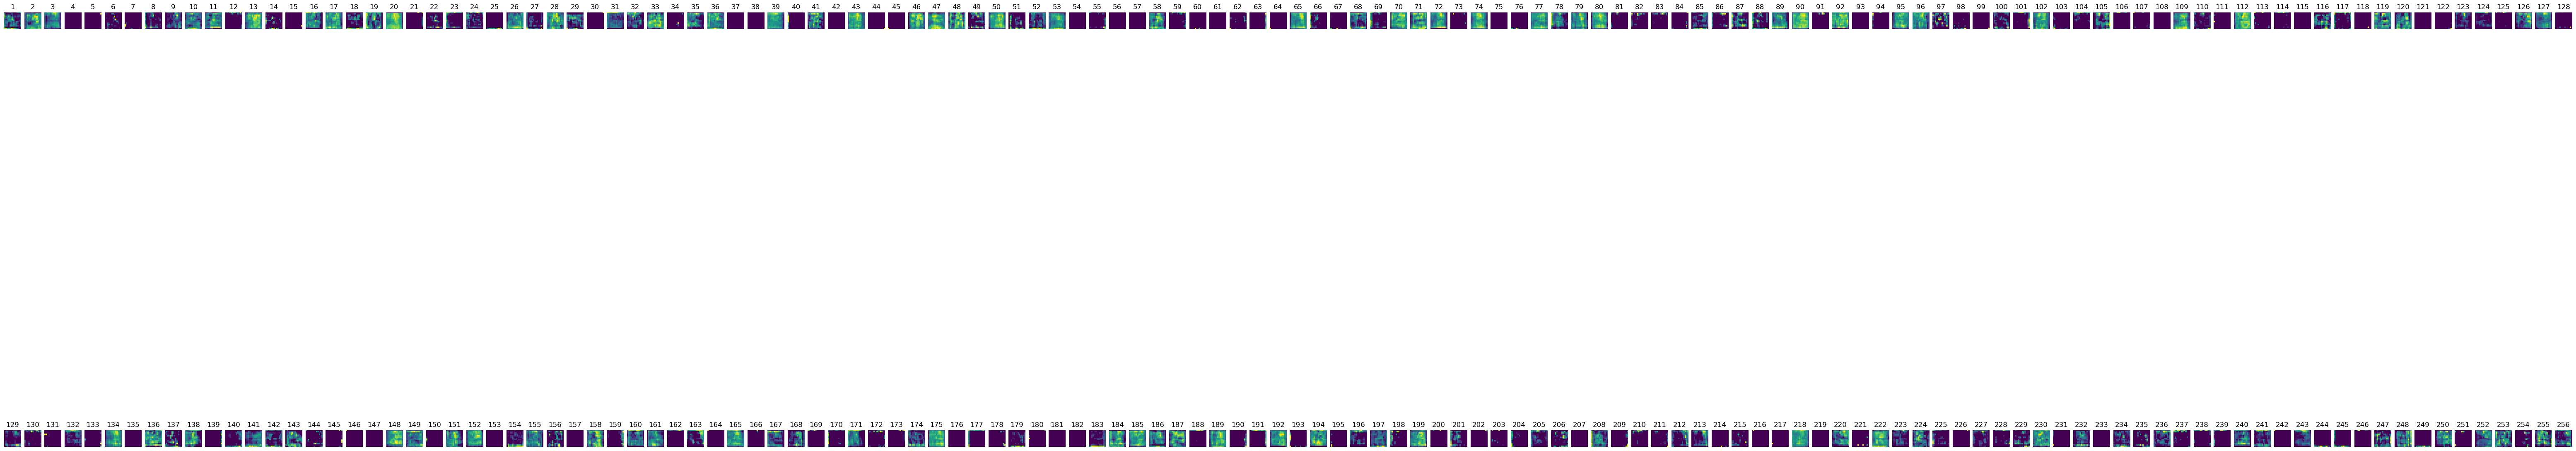

In [14]:
# Visualize the feature maps
feature_maps = activation['value'][0].detach()
plt.figure(figsize=(80,24))
for i in range(feature_maps.size(0)):
    plt.subplot(2, feature_maps.size(0) // 2, i + 1)
    plt.imshow(feature_maps[i], cmap='viridis')
    plt.title(f'{i + 1}')
    plt.axis('off')
plt.show()